In [ ]:
!pip install retvec
try:
    import tensorflow_text
except ImportError:
    !pip install tensorflow-text==2.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.0 MB/s eta 0:00:00


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'  # silence TF INFO messages
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
dataSet = pd.read_csv('/content/drive/MyDrive/Phishing_Email.csv')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Phishing_Email.csv'

In [ ]:
#data prep and separete into two categories test and train (only run once if )
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from retvec.tf import RETVecTokenizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
#dataSet = pd.read_csv('Phishing_Email.csv')
email = dataSet['Email Text']

# num of phishing and safe at all data before removing sum phishing
phising = (dataSet['Email Type'] == "Phishing Email").sum()
safe = (dataSet['Email Type'] == "Safe Email").sum()
print(f"phising precentage: {phising}")
print(f"safe precentage: {safe}")



# Remove 2000 rows (almost 50% of phishing) 10% of total dataset
value_to_remove = 'Phishing Email' # phishing
num_rows_to_remove = 2000
# Filter the dataset based on the 'Email Type' column
phishingSet = dataSet[dataSet['Email Type'] == value_to_remove]
# Remove the first num_rows_to_remove rows
phishingSet = phishingSet.iloc[num_rows_to_remove:].reset_index(drop=True)
safeSet=dataSet[dataSet['Email Type'] == 'Safe Email']
# Concatenate vertically (along rows)
result = pd.concat([phishingSet, safeSet], ignore_index=True)
result = result.sample(frac=1)

x_train, x_test, y_train, y_test = train_test_split(result['Email Text'], result['Email Type'],test_size=0.2, random_state=0, shuffle=True)

test = pd.DataFrame()
test['Email Text']= x_test
# Create two new columns
test['Email Type'] = y_test
# Remove 1000 rows (almost 50% of phishing) 10% of total dataset
value_to_remove = 'Safe Email'
num_rows_to_remove = 1000
# Filter the dataset based on the 'Email Type' column
SafeSet = test[test['Email Type'] == value_to_remove]
# Remove the first num_rows_to_remove rows
SafeSet = SafeSet.iloc[num_rows_to_remove:].reset_index(drop=True)
PhishingSet = test[test['Email Type'] == 'Phishing Email']

# num of phishing and safe at all data before removing sum phishing
phising = (test['Email Type'] == 'Phishing Email').sum()
safe = (test['Email Type'] == 'Safe Email').sum()
print(f"phising precentage: {phising}")
print(f"safe precentage: {safe}")

# Concatenate vertically (along rows)
result = pd.concat([SafeSet , PhishingSet], ignore_index=True)
result = result.sample(frac=1)



# Now y_train_df has two columns 'label_0' and 'label_1' where 'label_0' contains 1 for 0 values and 'label_1' contains 1 for 1 values
x_train = x_train.astype(str)
x_train = tf.constant(x_train, dtype=tf.string)
le = LabelEncoder()
y_train = le.fit_transform(y_train)

x_test=result['Email Text']
y_test=result['Email Type']
x_test = x_test.astype(str)
x_test = tf.constant(x_test, dtype=tf.string)
y_test = le.transform(y_test)

phising = (y_test == 0).sum()
safe = (y_test == 1).sum()
print(f"phising precentage at Testing: {phising}")
print(f"safe precentage at Testing: {safe}")



# Train and Test Dataframe Split and Save
trainDataframe = pd.DataFrame()
trainDataframe['Email Text']=x_train
# Create two new columns
trainDataframe['Phishing Email']=(y_train == 0).astype(int)
trainDataframe['Safe Email']=(y_train == 1).astype(int)
trainDataframe.to_csv('TrainRetVec.csv', index=False)

testDataframe = pd.DataFrame()
testDataframe['Email Text']= x_test
# Create two new columns
testDataframe['Phishing Email']=(y_test== 0).astype(int)
testDataframe['Safe Email']=(y_test == 1).astype(int)
testDataframe.to_csv('TestRetVec.csv', index=False)
print(testDataframe['Safe Email'])
print(testDataframe['Phishing Email'])

# 1 Safe & 0 Phishing

phising precentage: 7328
safe precentage: 11322
phising precentage: 1061
safe precentage: 2269
phising precentage at Testing: 1061
safe precentage at Testing: 1269
0       1
1       1
2       0
3       1
4       1
       ..
2325    1
2326    0
2327    0
2328    1
2329    0
Name: Safe Email, Length: 2330, dtype: int64
0       0
1       0
2       1
3       0
4       0
       ..
2325    0
2326    1
2327    1
2328    0
2329    1
Name: Phishing Email, Length: 2330, dtype: int64


In [ ]:
!pip install retvec
import pandas as pd
import tensorflow as tf
from retvec.tf import RETVecTokenizer
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# Define the input layer, which accepts raw strings
print(tf.__version__)
inputs = layers.Input(shape=(1, ), name="Emails tokens" , dtype = tf.string )

# Add the RETVec Tokenizer layer using the RETVec embedding model -- that's it!
NUM_CLASSES = 2

# x = RETVecTokenizer()(inputs)
#reloaded_model = TFSMLayer("/root/.keras/retvec-v1", call_endpoint="serving_default")(inputs)
#save the model
x = RETVecTokenizer(model='retvec-v1')(inputs)
# Create your model like normal
# e.g. a simple LSTM model for classification with NUM_CLASSES classes
x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(NUM_CLASSES, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

2.15.0
645/645 [==============================] - 0s 0us/step


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Emails tokens (InputLayer)  [(None, 1)]               0         
                                                                 
 ret_vec_tokenizer (RETVecT  (None, 128, 256)          230144    
 okenizer)                                                       
                                                                 
 bidirectional (Bidirection  (None, 128, 128)          164352    
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 128)               98816     
 onal)                                                           
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                             

In [ ]:
# save the model
# save_path = "./demo_models/tf_lite_retvec"
# model.save(save_path)
# compile and train the model like usual
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD

checkpoint_filepath = 'best_model_weights.h5'
model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    monitor='val_accuracy',  # Monitor validation accuracy
    mode='max',  # Choose 'max' to save the best weights
    save_best_only=True  # Save only the best weights
)

train_data=pd.read_csv('TrainRetVec.csv')
x_train, x_test, y_train, y_test = train_test_split(train_data['Email Text'],train_data[['Phishing Email','Safe Email']],test_size=0.4, random_state=0, shuffle=True)
batch_size = 100
epochs = 20

# Initialize SGD with Momentum lr is learning rate
sgd = SGD(lr=0.0001, momentum=0.8, nesterov=True)
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',  loss='binary_crossentropy', metrics=METRICS)
print("x_train", x_train.shape)
print("x_test", x_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_test, y_test) , callbacks=[model_checkpoint_callback])# callbacks

x_train (5994,)
x_test (3996,)
y_train (5994, 2)
y_test (3996, 2)
Epoch 1/20
60/60 [==============================] - 28s 371ms/step - loss: 0.5619 - accuracy: 0.7120 - precision: 0.7120 - recall: 0.7120 - val_loss: 0.5447 - val_accuracy: 0.7432 - val_precision: 0.7432 - val_recall: 0.7432
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


60/60 [==============================] - 20s 336ms/step - loss: 0.3983 - accuracy: 0.8150 - precision: 0.8150 - recall: 0.8150 - val_loss: 0.4438 - val_accuracy: 0.8163 - val_precision: 0.8163 - val_recall: 0.8163
Epoch 3/20
60/60 [==============================] - 20s 335ms/step - loss: 0.3065 - accuracy: 0.8682 - precision: 0.8682 - recall: 0.8682 - val_loss: 0.3577 - val_accuracy: 0.8343 - val_precision: 0.8343 - val_recall: 0.8343
Epoch 4/20
60/60 [==============================] - 20s 335ms/step - loss: 0.2718 - accuracy: 0.8889 - precision: 0.8889 - recall: 0.8889 - val_loss: 0.3708 - val_accuracy: 0.8481 - val_precision: 0.8481 - val_recall: 0.8481
Epoch 5/20
60/60 [==============================] - 20s 333ms/step - loss: 0.2221 - accuracy: 0.9102 - precision: 0.9102 - recall: 0.9102 - val_loss: 0.6220 - val_accuracy: 0.7773 - val_precision: 0.7773 - val_recall: 0.7773
Epoch 6/20
60/60 [==============================] - 20s 333ms/step - loss: 0.1996 - accuracy: 0.9139 - precisio

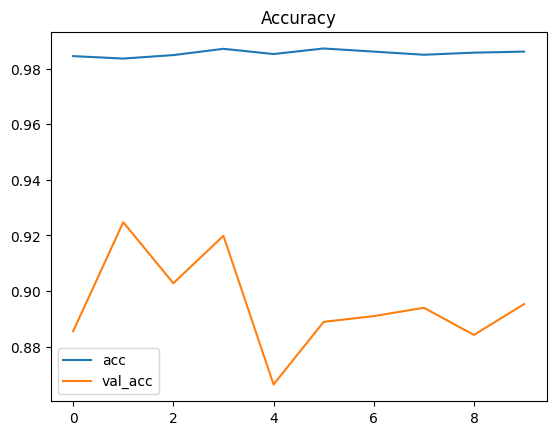

In [ ]:
# visualize the training curves
!pip install matplotlib
from matplotlib import pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.title(f'Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_curve, auc
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score

test_data=pd.read_csv('test_data.csv')
test_data['target'] = test_data['target'].apply(lambda x: 1 if x == 0 else 0)
# print(test_data['Phishing Email'])
# print(test_data['Safe Email'])
y_pred = model.predict(test_data['text'])
y_pred_label = np.argmax(y_pred, axis=1)
print(y_pred_label)

# Convert true labels back to label encoding
y_test_label = test_data['target']

print(y_test_label)
# Calculate accuracy
accuracy = accuracy_score(y_test_label, y_pred_label)
print("Accuracy:", accuracy)
# Calculate precision, recall, and thresholds
# precision, recall, thresholds = precision_recall_curve(y_test_label, y_pred_label)
precision = precision_score(y_test_label, y_pred_label, average='weighted')
recall = recall_score(y_test_label, y_pred_label, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

# Calculate AUC-PR
# auc_pr = auc(recall, precision)
# print("AUC-PR:", auc_pr)

37/37 [==============================] - 2s 48ms/step
[1 1 1 ... 1 1 1]
0       1
1       1
2       1
3       1
4       0
       ..
1155    1
1156    0
1157    1
1158    0
1159    0
Name: target, Length: 1160, dtype: int64
Accuracy: 0.6758620689655173
Precision: 0.7813822958650545
Recall: 0.6758620689655173


In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_curve, auc
test_data=pd.read_csv('spam_assassin.csv')
y_pred = model.predict(test_data['Email Text'])
# Convert predictions back to label encoding
y_pred_label = np.argmax(y_pred, axis=1)
print(y_pred_label)

# Convert true labels back to label encoding
y_test_label = np.column_stack((test_data['Phishing Email'], test_data['Safe Email']))
print("2D Array:")
print(y_test_label)
y_test_label = np.argmax(y_test_label, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_label, y_pred_label)
print("Accuracy:", accuracy)
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_label, y_pred_label)
# Calculate AUC-PR
auc_pr = auc(recall, precision)
print("AUC-PR:", auc_pr)

FileNotFoundError: [Errno 2] No such file or directory: 'spam_assassin.csv'

In [ ]:
model.save_weights(checkpoint_filepath)# .save to save model with archeiture / .save_weights only saves weights and arise error in loading
# model.save('savedModel')
#ValueError: No model config found in the file at <tensorflow.python.platform.gfile.GFile object at 0x0000019366F711E0>.
print(f"Model weights saved to {checkpoint_filepath}")
# # Create a new model instance (assuming you've defined your model architecture)
# mod = build_model()

model_path = 'my_model.h5'

model.save(model_path)

print("Model saved successfully at:", model_path)

# # Restore the weights
model.load_weights(checkpoint_filepath)
# checks if same test is still working
test_data=pd.read_csv('/content/drive/MyDrive/TestRetVec.csv')
print(test_data['Phishing Email'])
print(test_data['Safe Email'])
y_pred = model.predict(test_data['Email Text'])
# Convert predictions back to label encoding
y_pred_label = np.argmax(y_pred, axis=1)
print(y_pred_label)

# Convert true labels back to label encoding
y_test_label = np.column_stack((test_data['Phishing Email'], test_data['Safe Email']))
print("2D Array:")
print(y_test_label)
y_test_label = np.argmax(y_test_label, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_label, y_pred_label)
print("Accuracy:", accuracy)
# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test_label, y_pred_label)
# Calculate AUC-PR
auc_pr = auc(recall, precision)

Model weights saved to best_model_weights.h5
Model saved successfully at: my_model.h5
0       0
1       0
2       1
3       1
4       0
       ..
2325    0
2326    0
2327    0
2328    0
2329    1
Name: Phishing Email, Length: 2330, dtype: int64
0       1
1       1
2       0
3       0
4       1
       ..
2325    1
2326    1
2327    1
2328    1
2329    0
Name: Safe Email, Length: 2330, dtype: int64
73/73 [==============================] - 2s 29ms/step
[1 1 0 ... 1 1 0]
2D Array:
[[0 1]
 [0 1]
 [1 0]
 ...
 [0 1]
 [0 1]
 [1 0]]
Accuracy: 0.8257510729613734


#Model Saving

In [ ]:

model_path = 'my_model.h5'

model.save(model_path)

print("Model saved successfully at:", model_path)


# **Model Loading**

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
from sklearn.metrics import classification_report

model_path = 'best_model.h5'
custom_objects = {'KerasLayer': hub.KerasLayer}
loaded_model = tf.keras.models.load_model(model_path, custom_objects=custom_objects)

results = loaded_model.evaluate(X_test_preprocessed, y_test)

accuracy = results[loaded_model.metrics_names.index('accuracy')]
precision = results[loaded_model.metrics_names.index('precision')]
recall = results[loaded_model.metrics_names.index('recall')]

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


In [ ]:
loaded_model = tf.keras.models.load_model('best_model.h5', custom_objects={'KerasLayer': hub.KerasLayer})

new_text = """begin forwarded text To: rah@shipwright.com From: hacker@vudu.net Date: Thu, 03 Oct 2002 06:01:38 -0700 (PDT) Subject: Re: The 3rd Annual Consult Hyperion Digital Identity ForumThe guy messed up his own URL. It should be http://www.digitalidforum.com which redirects to http://www.consult.hyperion.co.uk/digid3.html "R. A. Hettinga" wrote: > > Dear All, > > See www.digitalidentityforum.com for more details. Speakers include > Microsoft and Liberty Alliance, UK central and local government, > law > enforcement, financial services (Egg and RBS/NatWest), EC Research > Centre, a > psychologist and others. Look forward to seeing you there. > > Regards, > Dave Birch. > > -- > -- David Birch, Director, Consult Hyperion > -- > -- tel +44 (0)1483 301793, fax +44 (0)1483 561657 > -- mail dave@chyp.com, web http://www.chyp.com > -- > -- See you at the 2nd Annual Digital Transactions Forum in > Singapore > -- October 16th/17th 2002, see > http://www.digitaltransactionsforum.com/ > > --- end forwarded text > > > -- > ----------------- > R. A. Hettinga <mailto: rah@ibuc.com> > The Internet Bearer Underwriting Corporation <http://www.ibuc.com/>; > 44 Farquhar Street, Boston, MA 02131 USA > "... however it may deserve respect for its usefulness and > antiquity, > [predicting the end of the world] has not been found agreeable to > experience." -- Edward Gibbon, 'Decline and Fall of the Roman > Empire' > > For help on using this list (especially unsubscribing), send a > message to > "dcsb-request@reservoir.com" with one line of text: "help".--- end forwarded text -- ----------------- R. A. Hettinga The Internet Bearer Underwriting Corporation 44 Farquhar Street, Boston, MA 02131 USA "... however it may deserve respect for its usefulness and antiquity, [predicting the end of the world] has not been found agreeable to experience." -- Edward Gibbon, 'Decline and Fall of the Roman Empire'
"""

new_text_preprocessed = np.array([str(new_text)])

predictions = "Phishing" if loaded_model.predict(new_text_preprocessed) > 0.5 else "Safe"

print(predictions)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score
import torch
import pandas as pd

tokenizer = AutoTokenizer.from_pretrained("kauffinger/xlm-roberta-base-finetuned-enron")
model = AutoModelForSequenceClassification.from_pretrained("kauffinger/xlm-roberta-base-finetuned-enron")

test_data = pd.read_csv('Bert_Test_Subset.csv')

y_true = test_data['y_test']

inputs = tokenizer(list(test_data['X_test_preprocessed']), return_tensors="pt", padding=True, truncation=True)

with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits
predictions = torch.argmax(logits, dim=1)
y_pred = predictions.tolist()

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)


Accuracy: 0.8131313131313131
Precision: 0.3029045643153527
Recall: 0.8111111111111111


In [ ]:
test_data = pd.read_csv('Bert_Test_Subset.csv')
test_data['y_test']

0      1
1      0
2      1
3      0
4      0
      ..
985    0
986    0
987    0
988    0
989    0
Name: y_test, Length: 990, dtype: int64